In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Maternal Health Risk Prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Maternal Health Risk Prediction/Maternal Health Risk Data Set.csv
/content/drive/MyDrive/Maternal Health Risk Prediction/Maternal_health_risk_prediction_dataset_exploration.ipynb
/content/drive/MyDrive/Maternal Health Risk Prediction/Maternal_health_risk_prediction.ipynb
/content/drive/MyDrive/Maternal Health Risk Prediction/Maternal_health_risk_prediction(EDA).ipynb


In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/Maternal Health Risk Prediction/Maternal Health Risk Data Set.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


1.Variable Description and Identification

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


1.1 Checking missing/null values

In [ ]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

1.2 Checking duplicates

In [ ]:
print(f"There are {data.duplicated().sum()} duplicates data")
data.loc[data.duplicated(keep=False)].sort_values(by=data.columns.to_list())

There are 562 duplicates data


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,6.0,99.0,70,mid risk
849,10,100,50,6.0,99.0,70,mid risk
552,12,90,60,7.5,102.0,60,low risk
940,12,90,60,7.5,102.0,60,low risk
543,12,90,60,7.5,102.0,66,low risk
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,mid risk
772,60,120,85,15.0,98.0,60,mid risk
818,60,120,85,15.0,98.0,60,mid risk
114,63,140,90,15.0,98.0,90,high risk


2. Univariate Analysis

2.1 Categorical Variables

2.1.1 Risk Level

<ipython-input-42-5ff8e0c7a87e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count = sns.countplot(x="RiskLevel", data=data, ax=ax[1], order=risk_order, palette=p_colors)


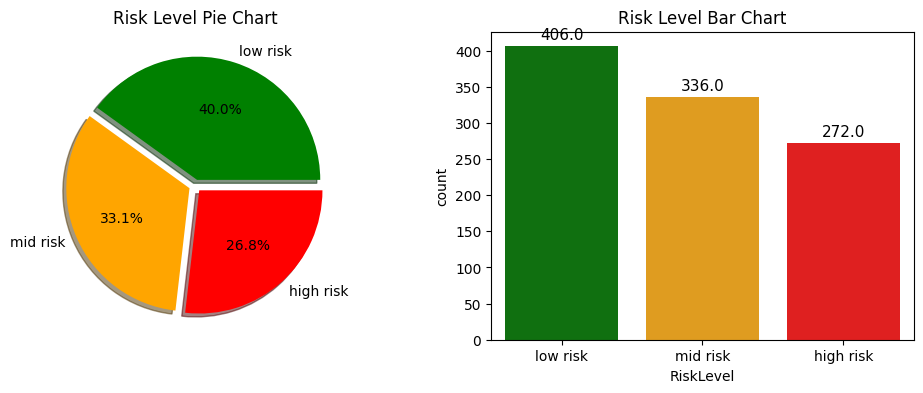

In [ ]:
p_colors = ['green', 'orange', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

data["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=data, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Risk Level Bar Chart")
plt.show()

The majority of expectant women in this dataset appear to be at low risk for health issues. Pregnant women in 406 (40%) of the 1014 observations have low risk, 336 (33.1%) have medium risk, and 272 (26.8%) have high risk. To learn more and understand why pregnant women are at a different health risk, we will examine the data. Every variable that could have an impact on it will be examined.

2.2 Numerical Variables

In [ ]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


As we can see, it appears that there is an outlier in the Age, BS, and HeartRate variables. However, this is only an educated guess.

In [ ]:
def num_plot(data, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Boxplot")

    plt.show()

2.2.1 Age

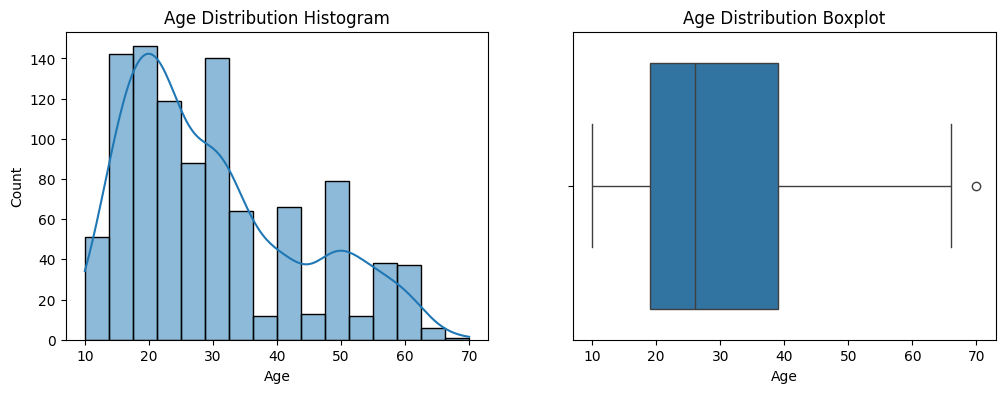

In [ ]:
num_plot(data, "Age")

2.2.2 Systolic BP

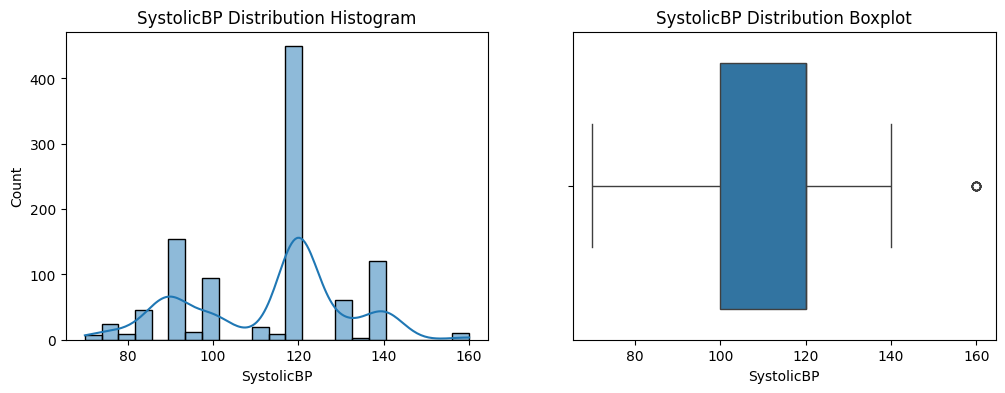

In [ ]:
num_plot(data, "SystolicBP")

2.2.3 Diastolic BP

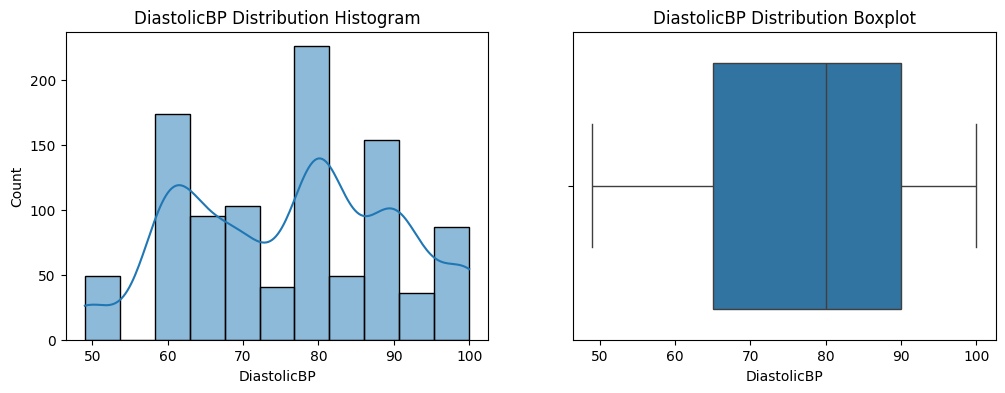

In [ ]:
num_plot(data, "DiastolicBP")

2.2.4 BS

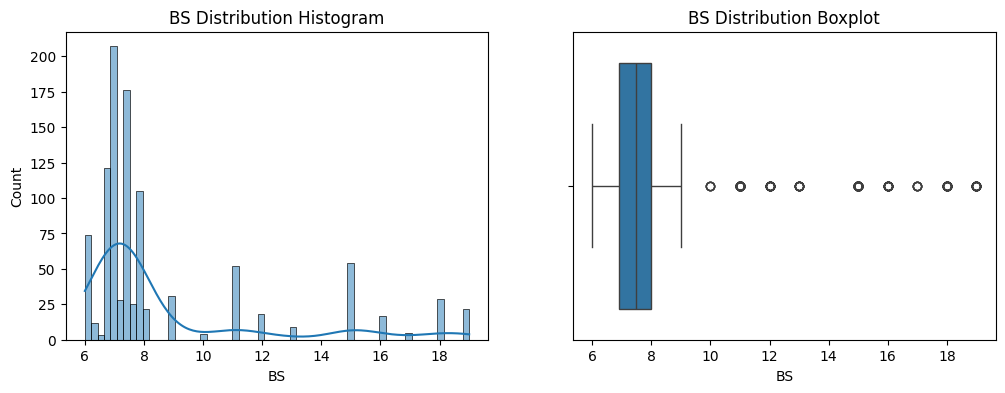

In [ ]:
num_plot(data, "BS")

2.2.5 Body Temp

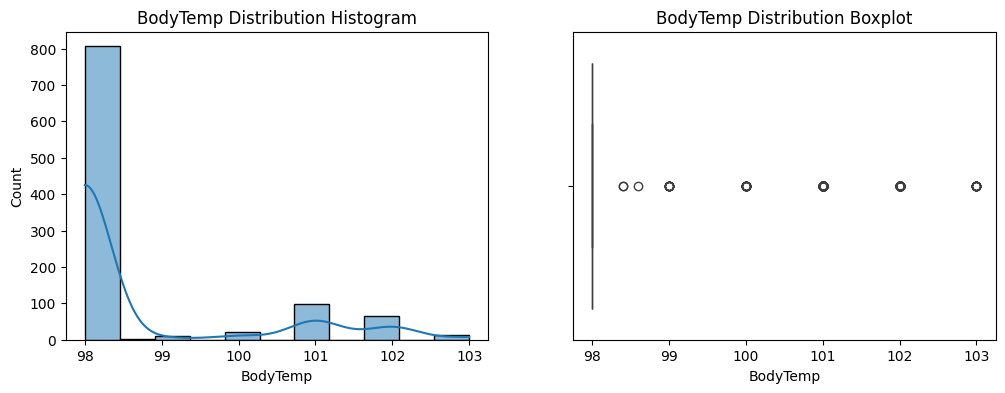

In [ ]:
num_plot(data, "BodyTemp")

2.2.6 Heart Rate

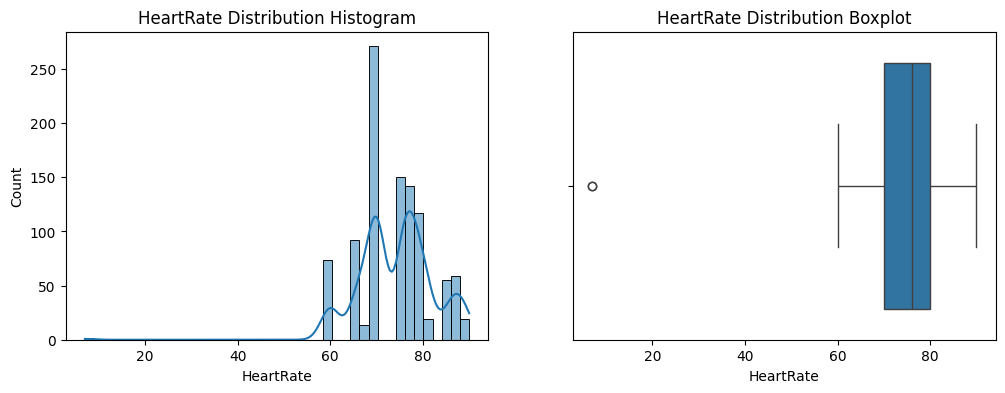

In [ ]:
num_plot(data, "HeartRate")

OBSERVATION:

It appears that there are outliers in almost every variable, which skews the distribution. With the exception of **HeartRate**, we will just ignore that outlier for the time being as the value appears to be normal in this situation. There is an outlier in that variable whose value deviates too much from the rest of the range.

3.Multivariate Analysis

3.1 Age and systolic BP -> RiskLevel

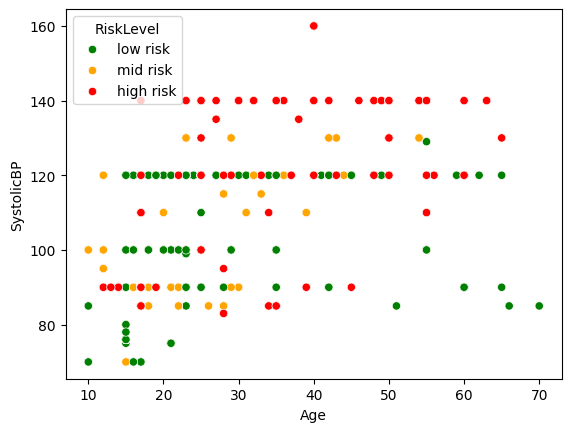

In [ ]:
sns.scatterplot(data=data, x="Age", y="SystolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:


1.Regardless of age, pregnant women with high Systolic blood pressure appear to be at a higher risk for health problems.


2.Being under 50 years old and having low systolic blood pressure does not ensure that our health risks are low; however, it appears that having low systolic blood pressure as we age reduces those risks.

3.2 Age and Diastolic BP ->RiskLevel

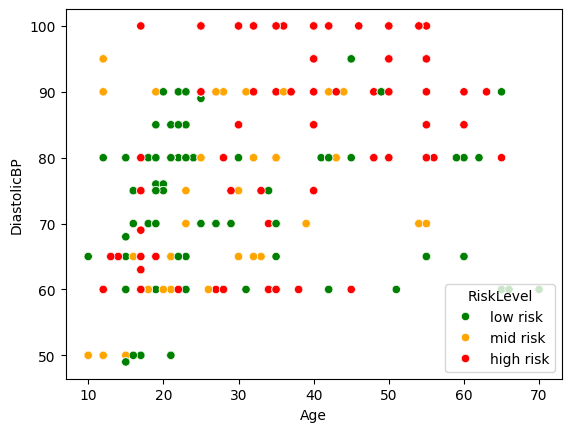

In [ ]:
sns.scatterplot(data=data, x="Age", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:

Given the strong correlation between systolic and diastolic blood pressure, we can observe the same pattern as previously.

3.3 Age and BS -> RiskLevel

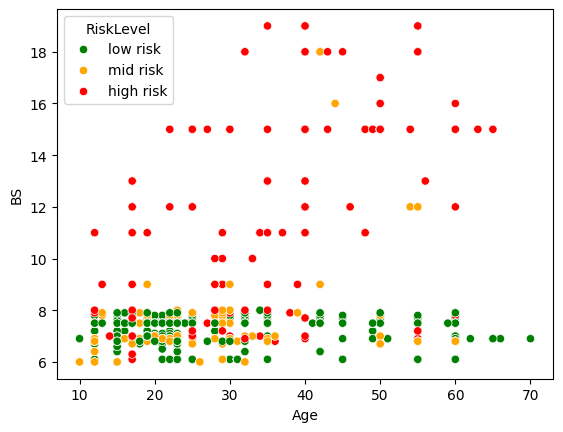

In [ ]:
sns.scatterplot(data=data, x="Age", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:

Regardless of age, pregnant women with elevated blood glucose levels appear to be at a higher risk for health problems.

3.4 Age and BodyTemp ->RiskLevel

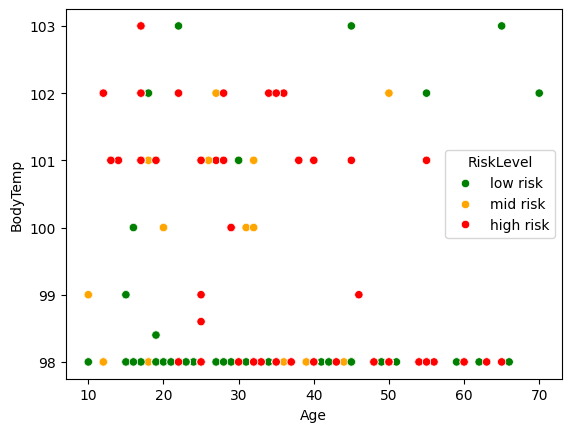

In [ ]:
sns.scatterplot(data=data, x="Age", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:

1.Younger women with normal body temperatures are generally not at high risk for health problems; however, if their body temperature is high, they will be.


2.It doesn't seem that older women's high body temperatures have a major impact on their health risks.

3.5 Age and HeartRate -> RiskLevel

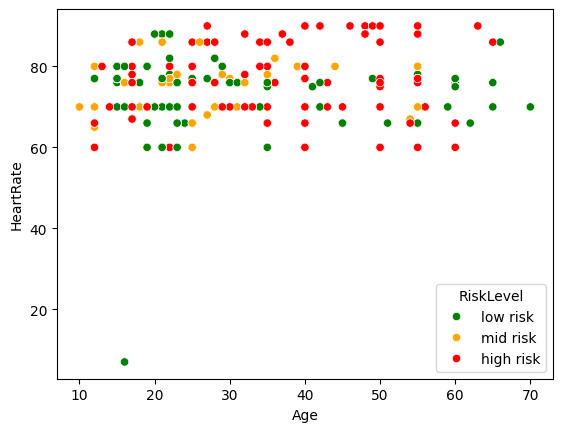

In [ ]:
sns.scatterplot(data=data, x="Age", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:

Age appears to have a greater impact on a pregnant woman's health risk than heart rate.

3.6 Systolic BP and DiastolicBP -> RiskLevel

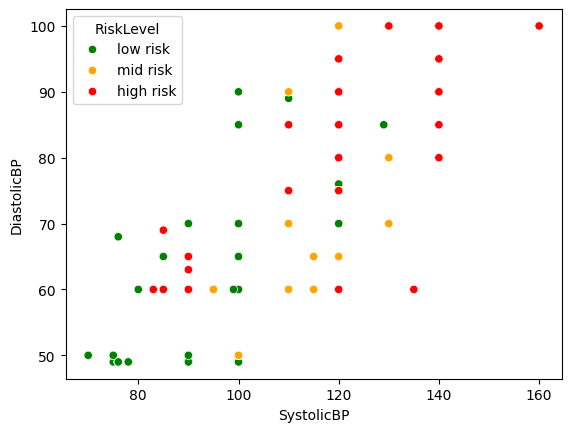

In [ ]:
sns.scatterplot(data=data, x="SystolicBP", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:

1.Pregnant women who have lower diastolic and systolic blood pressure appear to be at lower risk for health problems.

2.On the other hand, their risk of illness increases with increasing Systolic and Diastolic blood pressure.

3.7 Systolic BP and BS -> RiskLevel

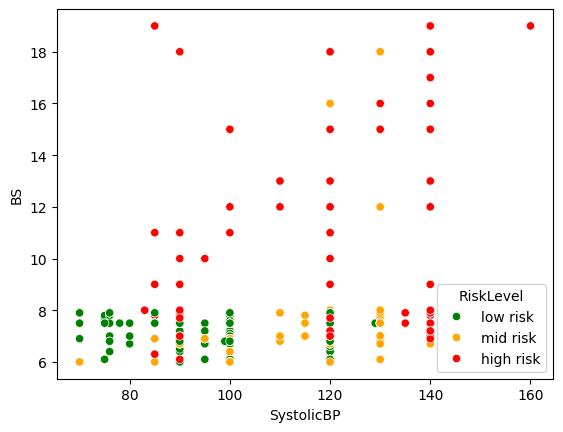

In [ ]:
sns.scatterplot(data=data, x="SystolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:

1.The pattern is essentially the same as it was before.

2.Nonetheless, it appears that pregnant women's health risks are more impacted by a higher BS value.

3.8 Systolic BP and Bodytemp -> RiskLevel

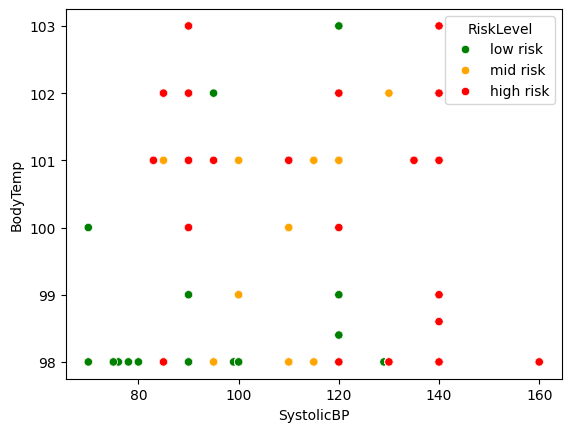

In [ ]:
sns.scatterplot(data=data, x="SystolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:

1.Pregnant women with low systolic blood pressure and normal body temperature typically pose little health risk.

2.But regardless of body temperature, the person with a high SystolicBP appears to be at greater risk for health problems.

3.9 Systolic BP and HeartRate -> RiskLevel

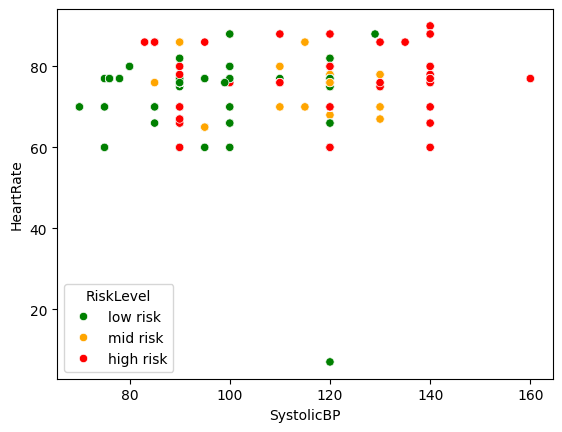

In [ ]:
sns.scatterplot(data=data, x="SystolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:

1.Compared to SystolicBP, HeartRate appears to have less of an impact on the health risk for expectant mothers.

2.It appears that the HeartRate variable is not very helpful.

3.10 Diastolic BP and BS -> RiskLevel

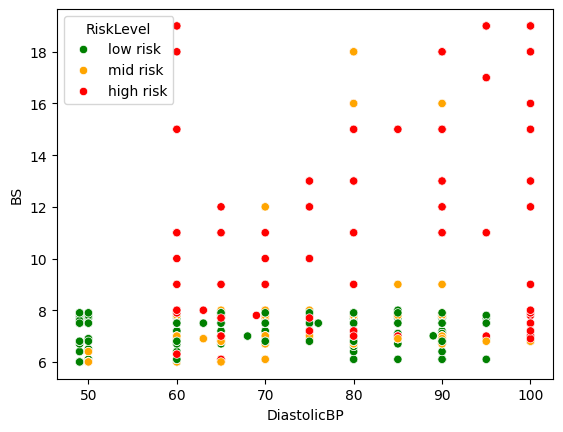

In [ ]:
sns.scatterplot(data=data, x="DiastolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:

Regardless of their diastolic blood pressure, pregnant women who have high blood glucose have a higher risk to their health.

3.11 Diastolic BP and BodyTemp -> RiskLevel

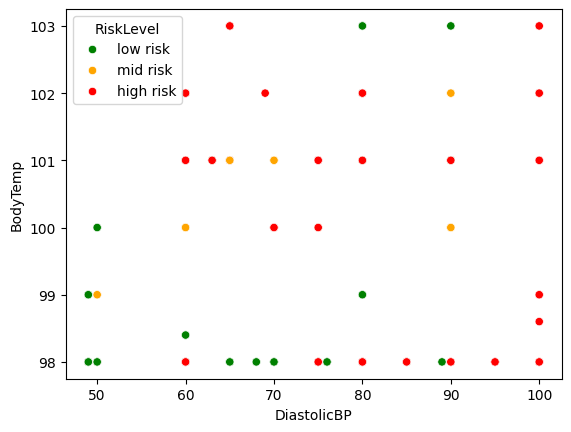

In [ ]:
sns.scatterplot(data=data, x="DiastolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:

The majority of pregnant women with low diastolic blood pressure and low body temperature have low health risks; however, if they have a higher body temperature, their risks increase.

3.12 Diastolic BP and HeartRate ->RiskLevel

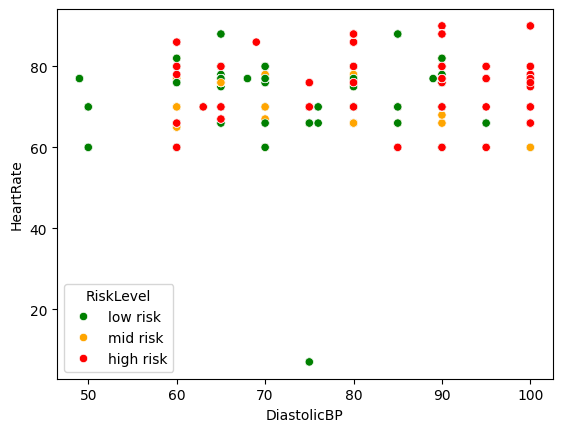

In [ ]:
sns.scatterplot(data=data, x="DiastolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:

1.Once more, heart rate seems to have less of an impact on the health risk of expectant mothers than diastolic blood pressure.

2.It appears that the HeartRate variable is not very helpful.

3.13 BS and BodyTemp -> RiskLevel

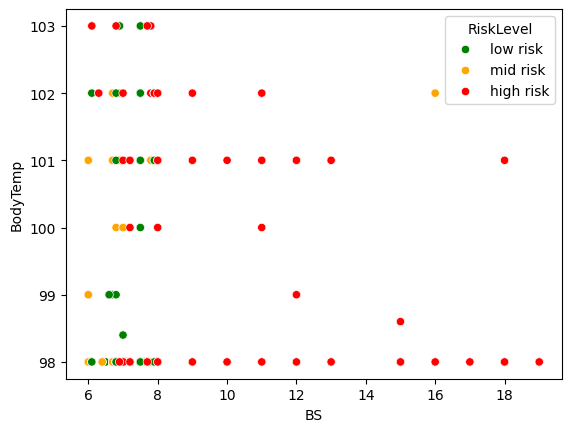

In [ ]:
sns.scatterplot(data=data, x="BS", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:

Regardless of body temperature, pregnant women with high blood glucose levels appear to be at a higher risk for health problems.

3.14 BS and HeartRate -> RiskLevel

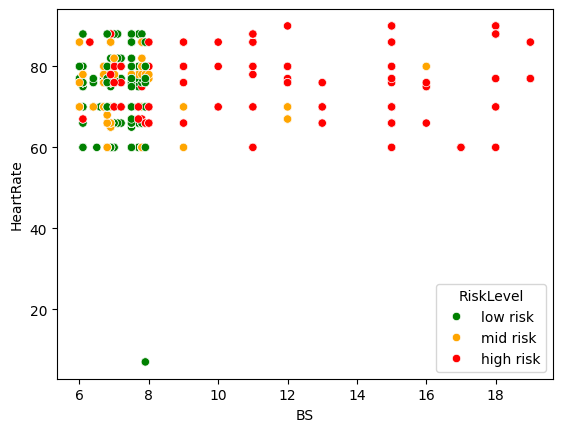

In [ ]:
sns.scatterplot(data=data, x="BS", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:

Regardless of their heart rate, pregnant women with higher blood glucose levels appear to be at greater risk for health problems.

3.16 BodyTemp and HeartRate -> RiskLevel

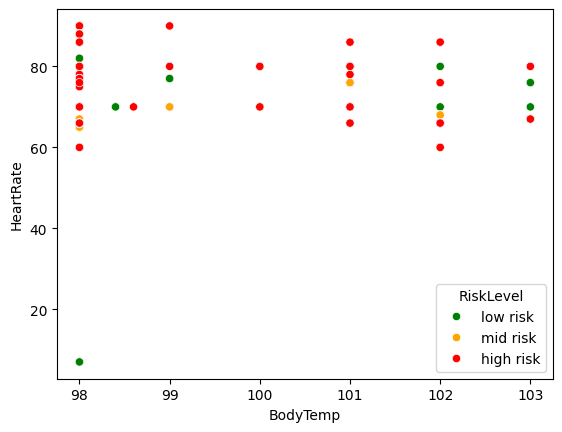

In [ ]:
sns.scatterplot(data=data, x="BodyTemp", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

OBSERVATION:

1.Regardless of their heart rate, pregnant women who have higher body temperatures appear to be at greater risk for health problems.

2.The heart rate variable isn't very useful in this situation.

4.Correlation Analysis

In [ ]:
# Map RiskLevel to integer values
risk_mapping = {"low risk": 0, "mid risk": 1, "high risk": 2}
data["RiskLevel"] = data["RiskLevel"].map(risk_mapping)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


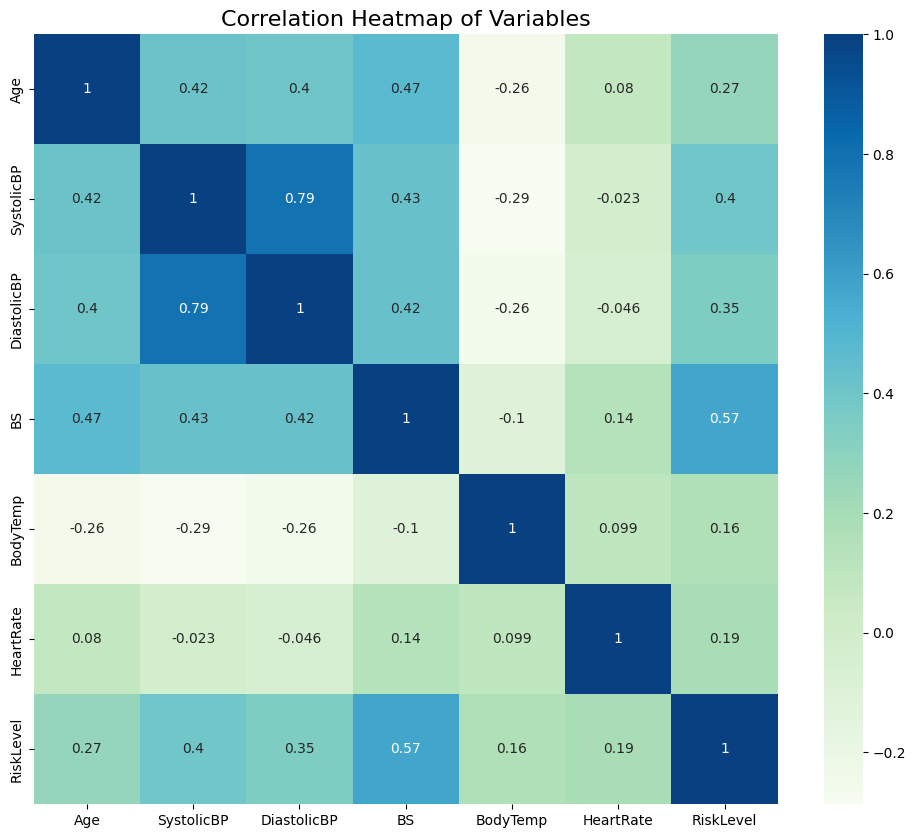

In [ ]:
# Create a correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap = "GnBu")
plt.title("Correlation Heatmap of Variables", fontsize=16)
plt.show()

OBSERVATION:

Multicollinearity is indicated by the strong positive correlation between systolic and diastolic blood pressure (correlation coefficient = 0.79). This shows that the information in these two variables is redundant.

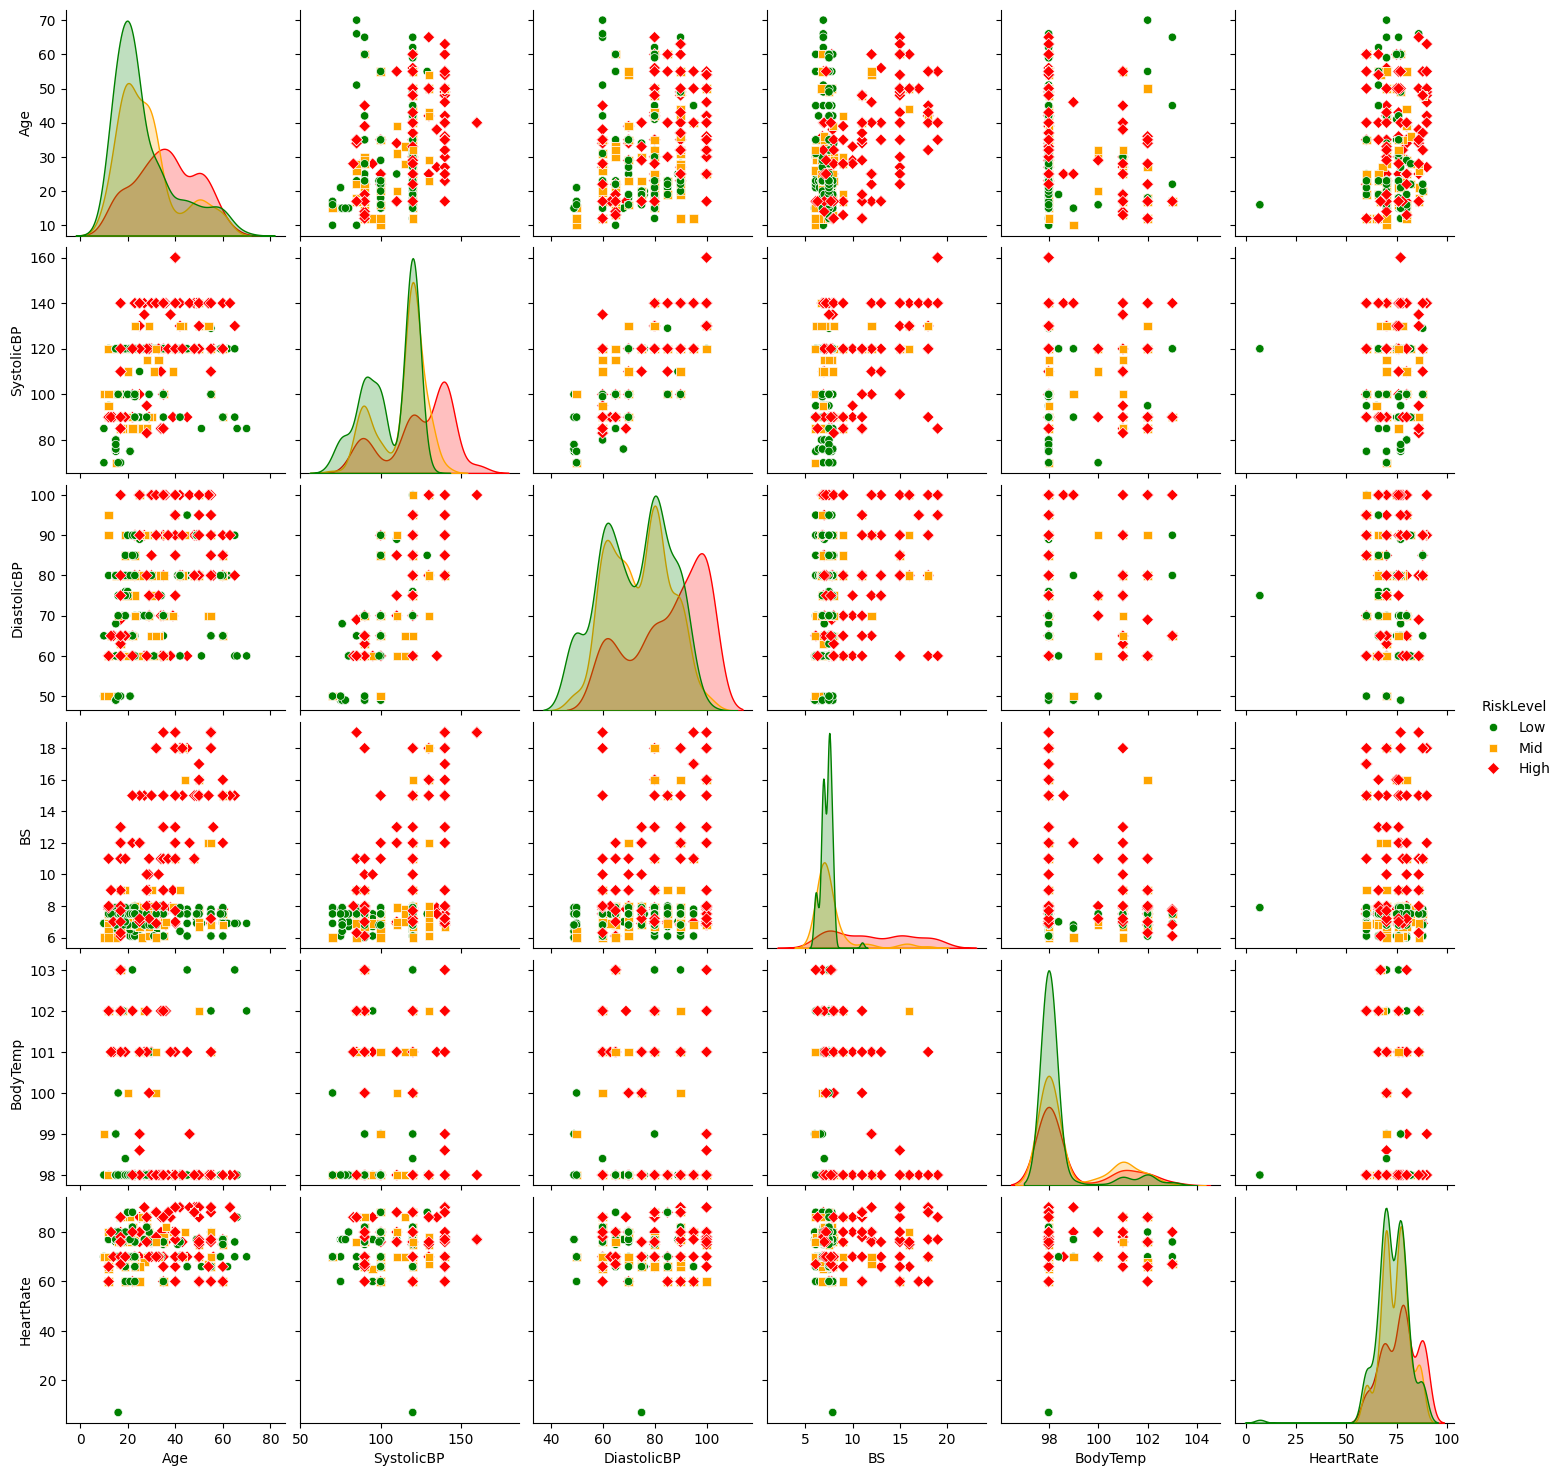

In [ ]:
# Create a pairplot with RiskLevel
risk_colors = {0: "green", 1: "orange", 2: "red"}

plot = sns.pairplot(data, hue='RiskLevel',
                    palette=risk_colors,
                    markers=["o", "s", "D"])

legend_labels = {"0": "Low", "1": "Mid", "2": "High"}
for text, label in zip(plot._legend.texts, legend_labels.values()):
    text.set_text(label)

plt.show()

OBSERVATION:

**Age:** According to the EDA, pregnant women under the age of 24 typically have a lower health risk, and risks increase as they get older. Interestingly, women over 59 years of age have a surprisingly lower risk, which adds an interesting dimension to the age-related health risk pattern.

**Systolic and diastolic blood pressure:** A thorough analysis of the correlation heatmap reveals a high degree of agreement between the two blood pressure measurements. Greater health risks are indicated by elevated values of both indicators. It's interesting to note that low Systolic and Diastolic blood pressure when one is young does not guarantee low health risk; however, as one ages, a possible protective effect appears to manifest.

**BS (Blood Glucose):** Regardless of other variables in the dataset, observations suggest that pregnant women with blood glucose levels of 8 or higher typically face higher health risks.

**BodyTemp:** Research on body temperature reveals that the majority of pregnant women sustain a normal body temperature of 36.7°C. Remarkably, elevated health risks are correlated with higher body temperatures (>= 37.8°C). Older women seem to be less affected by high body temperatures in terms of health risks, whereas younger women with normal body temperatures typically show low health risks. Low Systolic and Diastolic blood pressure, along with a normal body temperature, are linked to a lower risk of illness.

**HeartRate:** A heart rate anomaly has been found, indicating the need for additional research. The data points to an increasing trend in health risks as heart rates rise. However, heart rate seems to have a relatively small impact on the health risks for pregnant women when compared to other variables.

5.Skewness of every column

In [ ]:
skewness = data.skew()

# Print skewness for each column
print("Skewness for each column:")
print(skewness)

Skewness for each column:
Age            0.783063
SystolicBP    -0.251189
DiastolicBP   -0.048441
BS             1.868203
BodyTemp       1.750988
HeartRate     -1.043525
RiskLevel      0.244556
dtype: float64


6.Detection of outliers

In [ ]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Detect outliers for each column
outliers = data.apply(detect_outliers_iqr)

# Print columns with outliers
print("Columns with outliers:")
print(outliers.any())

Columns with outliers:
Age             True
SystolicBP      True
DiastolicBP    False
BS              True
BodyTemp        True
HeartRate       True
RiskLevel      False
dtype: bool
